In [1]:
%pylab inline
from scipy.integrate import odeint

Populating the interactive namespace from numpy and matplotlib


### 8.01x - Lect 12 - Air Drag, Resistive Forces, Conservative Forces, Terminal Velocity

https://www.youtube.com/watch?v=djCCno4Cbcw

$
ma = mg - F_{res}
$

$
ma = mg - c_1*r*v + c_2*r^2*v^2
$

there is no analytical/exact solution

https://www.wolframalpha.com/input/?i=y%27%27(x)+%3D+-2y(x)++-4+y(x)%5E2

In [17]:
m = 0.034 # kg
r = 0.35  # m
c1 = 3.1e-4
c2 = 0.85
g = 9.81

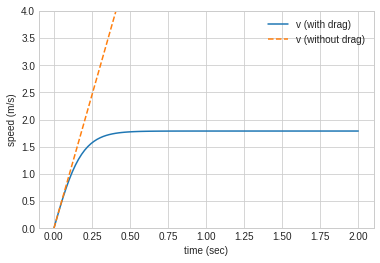

In [18]:
def model(v,t):
    return g - (c1*r*v + c2*r*r*v*v)/m

y0 = 3 # m
v0 = 0 # m/s

t = np.linspace(0, 2, 100)
vs = odeint(model, v0, t)

plt.plot(t, vs[:,0], '-', label="v (with drag)")
plt.plot(t, g*t+v0,  '--', label="v (without drag)")

plt.grid(True)
plt.xlabel('time (sec)')
plt.ylabel('speed (m/s)')
plt.legend();
plt.ylim(0,4);

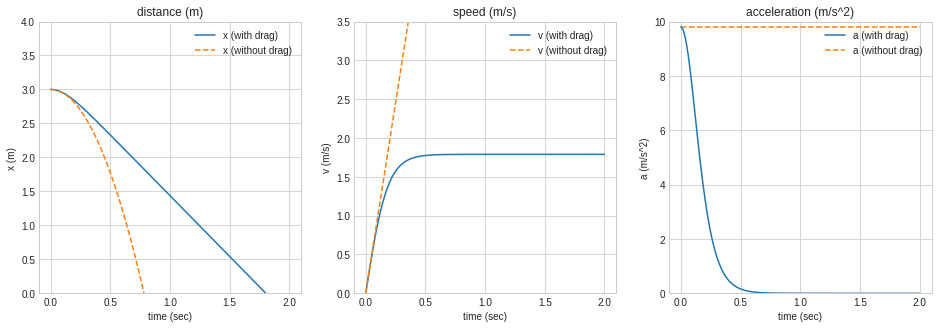

In [19]:
def model((x0,x1),t):
    '''
    x0 = x
    x1 = x' = v
    x2 = x'' = v' = a
    '''
    x = x0
    v = x1
    x2 = g - (c1*r*v + c2*r*r*v*v)/m
    return x1, x2

#y0 = 3 # m
x0 = 3 # m
v0 = 0 # m/s, x1 = x' = v

t = np.linspace(0, 2, 100)
xs = odeint(model, [0,0], t)

fig, (ax0,ax1,ax2) = plt.subplots(ncols=3, figsize=(16,5))

# distance
ax0.plot(t, x0 - xs[:,0], '-', label="x (with drag)")
ax0.plot(t, x0 - 0.5*g*t*t,  '--', label="x (without drag)")
ax0.set_ylabel('x (m)');
ax0.set_ylim(0, 4.0);
ax0.set_title('distance (m)')

# speed
ax1.plot(t, xs[:,1], '-', label="v (with drag)")
ax1.plot(t, g*t,  '--', label="v (without drag)")
ax1.set_ylabel('v (m/s)');
ax1.set_ylim(0, 3.5);
ax1.set_title('speed (m/s)')

# acceleration
_, ac = model((xs[:,0],xs[:,1]),t)
ax2.plot(t, ac, '-', label="a (with drag)")
ax2.hlines(g, min(t), max(t), linestyles='dashed', color='C1', label="a (without drag)")
ax2.set_ylabel('a (m/s^2)');
ax2.set_ylim(0, 10);
ax2.set_title('acceleration (m/s^2)')

for ax in [ax0,ax1,ax2]:
    ax.grid(True)
    ax.legend();
    ax.set_xlabel('time (sec)')
